<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/sklearn/6_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교차 검증

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

## k fold

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
iris = load_iris()

x = iris.data
y = iris.target
dt_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('데이터 세트 크기 :',x.shape[0])

데이터 세트 크기 : 150


In [ ]:
n_iter = 0

for train_index, test_index in kfold.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복 시마다 정확도 측정
    acc = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0}번째 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, acc, train_size, test_size))
    print('\n#{0}번째 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(acc)

print('\n## 평균 검증 정확도 :', np.round(np.mean(cv_accuracy), 4))


#1번째 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

#1번째 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2번째 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

#2번째 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3번째 교차 검증 정확도 : 0.8333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

#3번째 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4번째 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

#4번째 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5번째 교차 검증 정확도 : 0.8, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

#5번째 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9133


## StratifiedKFold

In [ ]:
df = pd.DataFrame(data=x, columns=iris.feature_names)
df['target'] = y
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)

n_iter = 0

for train_index, test_index in kfold.split(df):
    n_iter += 1
    label_train = df['target'].iloc[train_index]
    label_test = df['target'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())
    print('='*40)

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: target, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: target, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: target, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(df, df['target']):
    n_iter += 1
    label_train = df['target'].iloc[train_index]
    label_test = df['target'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())
    print('='*40)

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: target, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: target, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: target, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: target, dtype: int64


## cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=121)

data = iris.data
target = iris.target

scores = cross_val_score(dt_clf, data, target, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


# 회귀 문제 교차 검증

In [ ]:
from sklearn.datasets import load_diabetes

당뇨병 환자 442명의 특성과 당뇨병의 진행 정도를 나타내는 target 변수로 구성되어 있습니다.

In [ ]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print('데이터 세트 크기 :', df.shape)
df

데이터 세트 크기 : (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


1. Age (나이): 환자의 나이
2. Sex (성별): 환자의 성별
3. BMI (체질량 지수): 체중과 키를 고려한 체지방의 양을 나타내는 지수
4. BP (혈압): 혈액 내에서의 압력
5. S1, S2, S3, S4, S5, S6: 여러 혈액 검사 결과를 나타내는 여섯 가지 특성

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


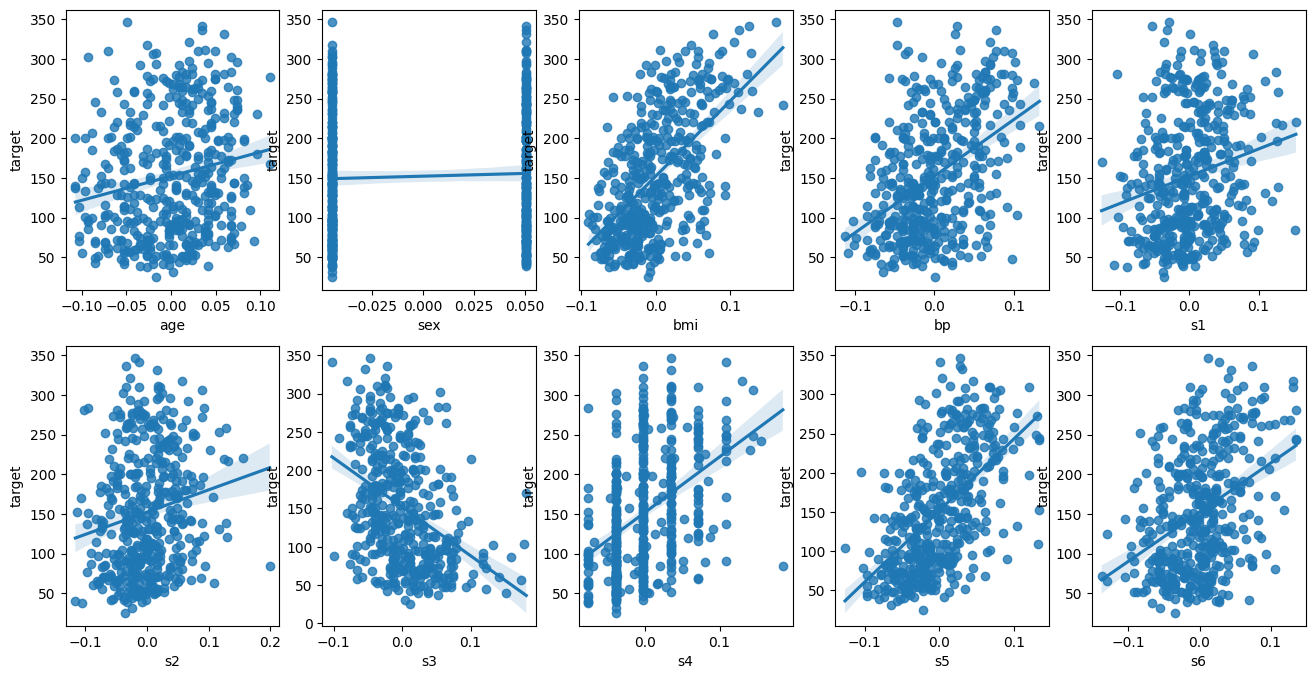

In [ ]:
x = df.iloc[:, :-1]

fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
features = x.columns

for i, feature in enumerate(features):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MSE :', np.round(mse, 4))
print('RMSE :', np.round(rmse, 4))
print('Variance score : {0:.4f}'.format(r2_score(y_test, pred)))

MSE : 2821.751
RMSE : 53.1202
Variance score : 0.4773


In [ ]:
neg_mse_scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 4))
print('5 folds 의 개별 RMSE score :', np.round(rmse_scores, 4))
print('5 folds 의 평균 RMSE :', np.round(avg_rmse, 4))

5 folds 의 개별 Negative MSE scores : [-2779.9234 -3028.8363 -3237.6876 -3008.7465 -2910.2127]
5 folds 의 개별 RMSE score : [52.725  55.0349 56.9007 54.852  53.9464]
5 folds 의 평균 RMSE : 54.6918
